# Análise sobre dados do CEAP

Fonte: https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps

# Teste de tratamento dos dados (2022)

## Primeira visualização

In [414]:
import pandas as pd

In [415]:
dados_ceaps_2022 = pd.read_csv("/content/drive/MyDrive/Cursos/#7DaysOfCode Alura/Despesas CEAPS 2008-2022 05/despesa_ceaps_2022.csv", encoding = "latin-1", sep = ";", nrows = 5)
dados_ceaps_2022.head()

ULTIMA ATUALIZACAO  \
ANO  MES SENADOR      TIPO_DESPESA                                       CNPJ_CPF           FORNECEDOR                        DOCUMENTO         DATA       DETALHAMENTO                                        VALOR_REEMBOLSADO   
2022 1   ACIR GURGACZ Aluguel de imóveis para escritório político, co... 004.948.028-63     GILBERTO PISELO DO NASCIMENTO     001/22            03/01/2022 Despesa com pagamento de aluguel de imóvel para...               6000   
                      Divulgação da atividade parlamentar                26.320.603/0001-64 INFORMANAHORA                     000000000000310/A 04/01/2022 Despesa com divulgação da atividade parlamentar...               1500   
                                                                         13.659.201/0001-47 LINHA PURPURA FOTO E VIDEO LTDA   107               14/01/2022 Despesa com produção de texto e edição de vídeo...               6000   
                                                                         23.652.846/0001-01 ROBERTO GUTIERREZ DA ROCHA M.E.I. 187               18/01/2022 Divulgação da atividade parlamentar                              1000   

                                                                                                                                                                                                              31/05/2022 02:01  
ANO  MES SENADOR      TIPO_DESPESA                                       CNPJ_CPF           FORNECEDOR                        DOCUMENTO         DATA       DETALHAMENTO                                          COD_DOCUMENTO  
2022 1   ACIR GURGACZ Aluguel de imóveis para escritório político, co... 004.948.028-63     GILBERTO PISELO DO NASCIMENTO     001/22            03/01/2022 Despesa com pagamento de aluguel de imóvel para...          2173614  
                      Divulgação da atividade parlamentar                26.320.603/0001-64 INFORMANAHORA                     000000000000310/A 04/01/2022 Despesa com divulgação da atividade parlamentar...          2173615  
                                                                         13.659.201/0001-47 LINHA PURPURA FOTO E VIDEO LTDA   107               14/01/2022 Despesa com produção de texto e edição de vídeo...          2173616  
                                                                         23.652.846/0001-01 ROBERTO GUTIERREZ DA ROCHA M.E.I. 187               18/01/2022 Divulgação da atividade parlamentar                         2173618

In [416]:
dados_ceaps_2022.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5 entries, ('ANO', 'MES', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR', 'DOCUMENTO', 'DATA', 'DETALHAMENTO') to ('2022', '1', 'ACIR GURGACZ', 'Divulgação da atividade parlamentar', '23.652.846/0001-01', 'ROBERTO GUTIERREZ DA ROCHA M.E.I.', '187', '18/01/2022', 'Divulgação da atividade parlamentar')
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ULTIMA ATUALIZACAO  5 non-null      object
 1   31/05/2022 02:01    5 non-null      object
dtypes: object(2)
memory usage: 1.8+ KB


O arquivo começa com "ULTIMA ATUALIZACAO";"31/05/2022 02:01". Isso faz com que hajam apenas duas colunas e algumas linhas de valor igual se agrupem na tabela.

## Extração da última data de atualização

In [417]:
# Convertendo uma string em datetime
# Referência: https://www.alura.com.br/artigos/lidando-com-datas-e-horarios-no-python?gclid=Cj0KCQjw-daUBhCIARIsALbkjSZTiCmktYTMVezV0Ubq_ONo5bJ7O6QuNcoXBGSD3yH7n0x46v89QDIaAtBbEALw_wcB

from datetime import datetime

atualizacao_texto = pd.read_csv("/content/drive/MyDrive/Cursos/#7DaysOfCode Alura/Despesas CEAPS 2008-2022 05/despesa_ceaps_2022.csv", encoding = "latin-1", sep = ";", nrows = 0)
atualizacao_texto = atualizacao_texto.columns[1]

ultima_atualizacao_2022 = datetime.strptime(atualizacao_texto, '%d/%m/%Y %H:%M')
print("Última atualização do dataset " + str(ultima_atualizacao_2022))

Última atualização do dataset 2022-05-31 02:01:00


## Abertura do arquivo

In [418]:
# O header = 1 faz com que o arquivo seja lido a partir da segunda linha, ignorando a primeira e evitando o problema do multi index

dados_ceaps_2022 = pd.read_csv("/content/drive/MyDrive/Cursos/#7DaysOfCode Alura/Despesas CEAPS 2008-2022 05/despesa_ceaps_2022.csv", encoding = "latin-1", sep = ";", header = 1, decimal = ",")
dados_ceaps_2022.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000.0,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500.0,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000.0,2173616
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000.0,2173618
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000.0,2173617


In [419]:
dados_ceaps_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6160 entries, 0 to 6159
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                6160 non-null   int64  
 1   MES                6160 non-null   int64  
 2   SENADOR            6160 non-null   object 
 3   TIPO_DESPESA       6160 non-null   object 
 4   CNPJ_CPF           6160 non-null   object 
 5   FORNECEDOR         6160 non-null   object 
 6   DOCUMENTO          5858 non-null   object 
 7   DATA               6160 non-null   object 
 8   DETALHAMENTO       3308 non-null   object 
 9   VALOR_REEMBOLSADO  6160 non-null   float64
 10  COD_DOCUMENTO      6160 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 529.5+ KB


## Conversão de tipos

### Data

In [420]:
dados_ceaps_2022["DATA"] = pd.to_datetime(dados_ceaps_2022["DATA"])

### Valor do reembolso

In [421]:
dados_ceaps_2022["VALOR_REEMBOLSADO"] = dados_ceaps_2022["VALOR_REEMBOLSADO"].astype(float)

Agora que o tratamento dos dados parece satisfatório, vou unir os datasets dos últimos 4 anos (2018-2022).

# União dos dados de 2019 a 2022 e Tratamentos

### Abertura dos dados

In [422]:
def extrai_ultima_atualizacao(caminho):
  atualizacao_texto = pd.read_csv(caminho, encoding = "latin-1", sep = ";", nrows = 0)
  atualizacao_texto = atualizacao_texto.columns[1]

  ultima_atualizacao = datetime.strptime(atualizacao_texto, '%d/%m/%Y %H:%M')
  return ultima_atualizacao

In [423]:
ultima_atualizacao_2021 = extrai_ultima_atualizacao("/content/drive/MyDrive/Cursos/#7DaysOfCode Alura/Despesas CEAPS 2008-2022 05/despesa_ceaps_2021.csv")
ultima_atualizacao_2020 = extrai_ultima_atualizacao("/content/drive/MyDrive/Cursos/#7DaysOfCode Alura/Despesas CEAPS 2008-2022 05/despesa_ceaps_2020.csv")
ultima_atualizacao_2019 = extrai_ultima_atualizacao("/content/drive/MyDrive/Cursos/#7DaysOfCode Alura/Despesas CEAPS 2008-2022 05/despesa_ceaps_2019.csv")

print("Última atualização de 2022 " + str(ultima_atualizacao_2022))
print("Última atualização de 2021 " + str(ultima_atualizacao_2021))
print("Última atualização de 2020 " + str(ultima_atualizacao_2020))
print("Última atualização de 2019 " + str(ultima_atualizacao_2019))

Última atualização de 2022 2022-05-31 02:01:00
Última atualização de 2021 2022-05-31 02:00:00
Última atualização de 2020 2022-05-31 02:00:00
Última atualização de 2019 2021-08-06 02:08:00


In [424]:
dados_ceaps_2022 = pd.read_csv("/content/drive/MyDrive/Cursos/#7DaysOfCode Alura/Despesas CEAPS 2008-2022 05/despesa_ceaps_2022.csv", encoding = "latin-1", sep = ";", header = 1, decimal = ",")
#dados_ceap_2022.info()

In [425]:
dados_ceaps_2021 = pd.read_csv("/content/drive/MyDrive/Cursos/#7DaysOfCode Alura/Despesas CEAPS 2008-2022 05/despesa_ceaps_2021.csv", encoding = "latin-1", sep = ";", header = 1, decimal = ",")
#dados_ceap_2021.info()

In [426]:
dados_ceaps_2020 = pd.read_csv("/content/drive/MyDrive/Cursos/#7DaysOfCode Alura/Despesas CEAPS 2008-2022 05/despesa_ceaps_2020.csv", encoding = "latin-1", sep = ";", header = 1, decimal = ",")
#dados_ceap_2020.info()

In [427]:
dados_ceaps_2019 = pd.read_csv("/content/drive/MyDrive/Cursos/#7DaysOfCode Alura/Despesas CEAPS 2008-2022 05/despesa_ceaps_2019.csv", encoding = "latin-1", sep = ";", header = 1, decimal = ",")
#dados_ceap_2019.info()

In [428]:
dados_ceaps = pd.concat([dados_ceaps_2022, dados_ceaps_2021, dados_ceaps_2020, dados_ceaps_2019])
dados_ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58711 entries, 0 to 21633
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                58711 non-null  int64  
 1   MES                58711 non-null  int64  
 2   SENADOR            58711 non-null  object 
 3   TIPO_DESPESA       58711 non-null  object 
 4   CNPJ_CPF           58711 non-null  object 
 5   FORNECEDOR         58711 non-null  object 
 6   DOCUMENTO          56380 non-null  object 
 7   DATA               58711 non-null  object 
 8   DETALHAMENTO       32829 non-null  object 
 9   VALOR_REEMBOLSADO  58711 non-null  float64
 10  COD_DOCUMENTO      58711 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 5.4+ MB


In [429]:
dados_ceaps.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000.0,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500.0,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000.0,2173616
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000.0,2173618
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000.0,2173617


## Tratamentos

### Correção de datas

Algumas linhas estão com o ano inserido errado. Vou assumnir as seguintes substituições:
- 0202 = 2002
- 0219 = 2019

In [430]:
dados_ceaps["DATA"].str[5:].value_counts()

/2019    21565
/2021    16836
/2020    14000
/2022     6205
/2018       88
/2002        6
/2010        4
/0202        2
/2014        2
/2009        1
/0219        1
/2016        1
Name: DATA, dtype: int64

In [431]:
index_erro_0202 = dados_ceaps['DATA'].str.contains('/0202')
index_erro_0219 = dados_ceaps['DATA'].str.contains('/0219')

In [432]:
dados_ceaps[index_erro_0202]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2148,2021,11,CARLOS VIANA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,ADRIA VIAGENS E TURISMO LTDA,YK1QHD,29/10/0202,"Companhia Aérea: AZUL, Localizador: YK1QHD. Pa...",339.9,2169237
10362,2020,5,PLÍNIO VALÉRIO,Divulgação da atividade parlamentar,27.209.437/0001-96,Excelsior Comunicação Digital Ltda,2020/9,05/05/0202,NaN,1150.0,2144535


In [433]:
dados_ceaps[index_erro_0219]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
10986,2019,1,LÚCIA VÂNIA,"Aluguel de imóveis para escritório político, c...",08.573.731/0001-38,LDE Contabilidade e Administração de Condomíni...,0107007,31/01/0219,Taxa condominial,271.26,2114251


In [434]:
dados_ceaps["DATA"] = [x.replace('0202', '2002') for x in dados_ceaps["DATA"]]
dados_ceaps["DATA"] = [x.replace('0219', '2019') for x in dados_ceaps["DATA"]]

In [435]:
dados_ceaps[index_erro_0202]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2148,2021,11,CARLOS VIANA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,ADRIA VIAGENS E TURISMO LTDA,YK1QHD,29/10/2002,"Companhia Aérea: AZUL, Localizador: YK1QHD. Pa...",339.9,2169237
10362,2020,5,PLÍNIO VALÉRIO,Divulgação da atividade parlamentar,27.209.437/0001-96,Excelsior Comunicação Digital Ltda,2020/9,05/05/2002,NaN,1150.0,2144535


In [436]:
dados_ceaps[index_erro_0219]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
10986,2019,1,LÚCIA VÂNIA,"Aluguel de imóveis para escritório político, c...",08.573.731/0001-38,LDE Contabilidade e Administração de Condomíni...,0107007,31/01/2019,Taxa condominial,271.26,2114251


In [437]:
dados_ceaps["DATA"].str[6:].value_counts()

2019    21566
2021    16836
2020    14000
2022     6205
2018       88
2002        8
2010        4
2014        2
2009        1
2016        1
Name: DATA, dtype: int64

### Conversão da coluna DATA

In [438]:
dados_ceaps["DATA"] = pd.to_datetime(dados_ceaps["DATA"])

In [439]:
#dados_ceaps.info()

### Conversão da coluna VALOR_REEMBOLSO

In [440]:
dados_ceaps["VALOR_REEMBOLSADO"] = dados_ceaps["VALOR_REEMBOLSADO"].astype(float)

In [441]:
#dados_ceap.info()

# Análise sobre os tipos de despesa

## Tipos de despesa

In [442]:
dados_ceaps["TIPO_DESPESA"].unique()

array(['Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.',
       'Divulgação da atividade parlamentar',
       'Passagens aéreas, aquáticas e terrestres nacionais',
       'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar',
       'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes',
       'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. ',
       'Serviços de Segurança Privada'], dtype=object)

In [443]:
recorrencia_despesas = dados_ceaps["TIPO_DESPESA"].value_counts()
recorrencia_despesas

Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   21100
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                           13088
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                 12756
Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.      4223
Divulgação da atividade parlamentar                                                                                                                                                                 

## Despesas mais recorrentes

In [444]:
recorrencia_despesas = pd.DataFrame(data = [recorrencia_despesas.index, recorrencia_despesas.values])
recorrencia_despesas = recorrencia_despesas.T.rename(columns = {0:'tipo_despesa', 1:'n_ocorrencias'})
recorrencia_despesas

,tipo_despesa,n_ocorrencias
0,"Locomoção, hospedagem, alimentação, combustíve...",21100
1,"Aluguel de imóveis para escritório político, c...",13088
2,"Passagens aéreas, aquáticas e terrestres nacio...",12756
3,Aquisição de material de consumo para uso no e...,4223
4,Divulgação da atividade parlamentar,3927
5,"Contratação de consultorias, assessorias, pesq...",3520
6,Serviços de Segurança Privada,97


A tabela acima enumera as ocorrências de cada tipo de despesa.

In [445]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Padronização dos gráficos de barras horizontais e tratamento dos labels extensos

In [446]:
def corta_label(label, largura_label = 50):
  label_cortada = label
  for l in range(largura_label, len(label), largura_label):
    while label_cortada[l] != " ":
      l += 1
    label_cortada = label_cortada[:l+1] + "\n" + label_cortada[l+1:]

  return label_cortada

def formata_labels(series_labels):
  list_labels = []
  for label in series_labels.values:
    list_labels.append(corta_label(label))
  return list_labels

def plota_barras_horizontais(data, x, y, formatacao = 'nenhuma', palette = "rainbow_r", titulo = "", xlabel = "", ylabel = ""):
  plt.figure(figsize = (13,10))
  sns.set_theme(style="whitegrid")

  ax = sns.barplot(data = data, x = x, y = y, palette = palette)

  labels = formata_labels(data[y])
  ax.set_yticklabels(labels)

  ax.set_title(titulo, fontsize = 25, pad = 25, loc = 'center')
  ax.tick_params(axis = 'y', labelsize = 15)
  ax.tick_params(axis = 'x', labelsize = 15)
  plt.xlabel(xlabel, fontsize = 20)
  plt.ylabel(ylabel)

  if formatacao == 'milhoes':
    ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x,_ : format(int(x/1000000), ',')))

  plt.show()

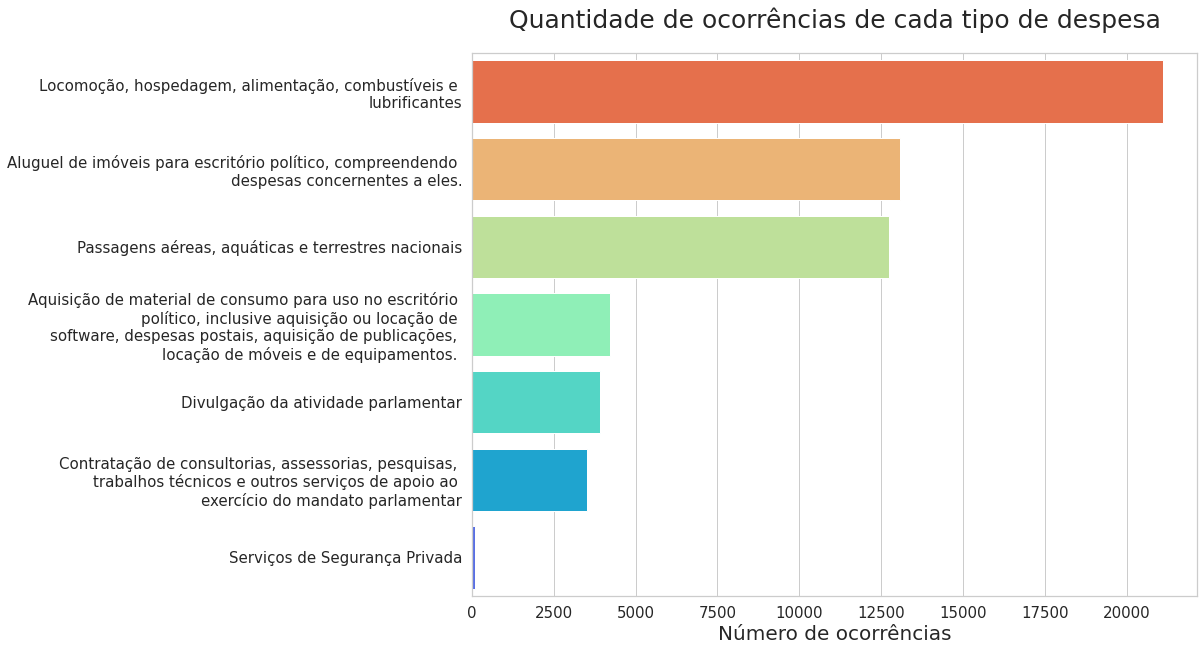

In [447]:
plota_barras_horizontais(recorrencia_despesas, x = 'n_ocorrencias', y = 'tipo_despesa', palette = 'rainbow_r',
                            titulo = "Quantidade de ocorrências de cada tipo de despesa", xlabel = "Número de ocorrências")

As despesas mais recorrentes estão relacionadas às viagens dos senadores.

## Gastos por tipo de despesa

In [448]:
valor_despesas = dados_ceaps.groupby("TIPO_DESPESA").sum()
valor_despesas = valor_despesas.reset_index()
valor_despesas = valor_despesas[["TIPO_DESPESA", "VALOR_REEMBOLSADO"]].rename(columns = {"TIPO_DESPESA":'tipo_despesa', "VALOR_REEMBOLSADO":'valor_total_reembolso'}).sort_values(by = 'valor_total_reembolso', ascending = False)

In [449]:
valor_despesas

,tipo_despesa,valor_total_reembolso
2,"Contratação de consultorias, assessorias, pesq...",20142994.76
5,"Passagens aéreas, aquáticas e terrestres nacio...",17972305.92
4,"Locomoção, hospedagem, alimentação, combustíve...",14271285.19
0,"Aluguel de imóveis para escritório político, c...",13615255.70
3,Divulgação da atividade parlamentar,10993370.97
1,Aquisição de material de consumo para uso no e...,3166002.92
6,Serviços de Segurança Privada,128965.12


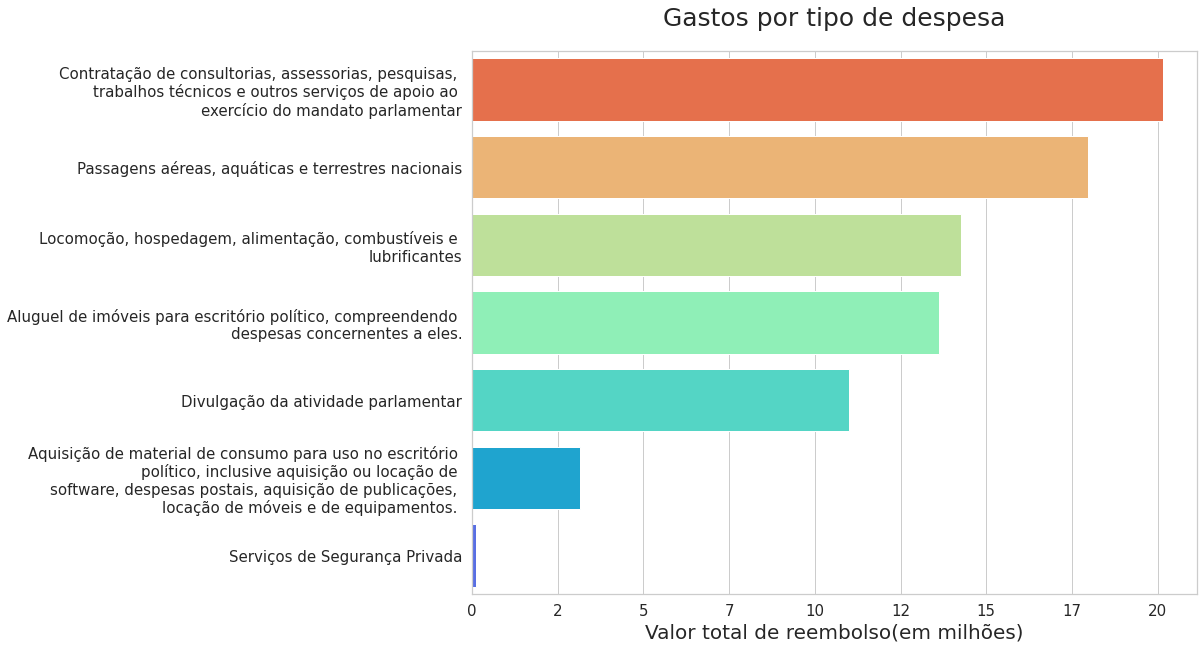

In [450]:
plota_barras_horizontais(valor_despesas, x = 'valor_total_reembolso', y = 'tipo_despesa', palette = 'rainbow_r',
                            titulo = "Gastos por tipo de despesa", xlabel = "Valor total de reembolso(em milhões)", formatacao = 'milhoes')